### Preprocessing Steps:

1. **Removing `Surname**: To simplify the model's interpretation.
2. **Splitting Raw Data**: Dividing raw data into training and validation sets.
3. **Categorical Data Processing**: Applying one-hot encoding.
4. **Scaling Numerical Features**: Feature scaling is optional for tree-based models 
   (controlled by the `scaler_numeric` parameter in the `preprocess_data` function 
   from the custom module `process_ban__k_churn.py`). This parameter can be set to 
   `True` or `False`, allowing the preprocessing code to be used with different models.


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import seaborn as sns
from typing import Tuple, Dict, List
from process_bank_churn___ import preprocess_data, preprocess_new_data

In [3]:
raw_df = pd.read_csv("train.csv", index_col=0)

data, fitted_transformers = preprocess_data(raw_df, 'Surname', 'Exited', 0.2, True)
display(data['X_train'])

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
id,,,,,,,,,,,,,,
7180,0.988516,0.599045,0.214286,0.1,0.626382,0.000000,1.0,1.0,0.719772,1.0,0.0,0.0,0.0,1.0
10393,0.984351,0.603819,0.375000,0.2,0.848836,0.000000,1.0,0.0,0.727603,1.0,0.0,0.0,1.0,0.0
80,0.997112,0.653938,0.303571,0.6,0.554522,0.333333,1.0,0.0,0.872180,0.0,1.0,0.0,0.0,1.0
3365,0.997533,0.568019,0.714286,0.0,0.000000,0.333333,0.0,1.0,0.257797,0.0,0.0,1.0,0.0,1.0
12236,0.987805,0.658711,0.053571,0.3,0.000000,0.333333,1.0,1.0,0.742837,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9493,0.992666,0.482100,0.267857,0.4,0.000000,0.333333,0.0,0.0,0.617686,1.0,0.0,0.0,1.0,0.0
8463,0.997382,0.577566,0.392857,0.1,0.000000,0.000000,1.0,1.0,0.239129,1.0,0.0,0.0,1.0,0.0
8143,0.983807,0.453461,0.196429,0.8,0.000000,0.333333,1.0,1.0,0.667682,1.0,0.0,0.0,0.0,1.0


In [105]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15000 entries, 0 to 14999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       15000 non-null  float64
 1   Surname          15000 non-null  object 
 2   CreditScore      15000 non-null  float64
 3   Geography        15000 non-null  object 
 4   Gender           15000 non-null  object 
 5   Age              15000 non-null  float64
 6   Tenure           15000 non-null  float64
 7   Balance          15000 non-null  float64
 8   NumOfProducts    15000 non-null  float64
 9   HasCrCard        15000 non-null  float64
 10  IsActiveMember   15000 non-null  float64
 11  EstimatedSalary  15000 non-null  float64
 12  Exited           15000 non-null  float64
dtypes: float64(10), object(3)
memory usage: 1.6+ MB


In [4]:
fitted_transformers

{'scaler': MinMaxScaler(),
 'encoder': OneHotEncoder(handle_unknown='ignore', sparse_output=False)}

1. **Train a Decision Tree**: Train a decision tree with a fixed `random_state`, using default values for the other parameters.
2. **Output Area Under ROC**: Display the area under the ROC curve for the model on both training and testing datasets.
3. **Output Tree Depth**: Display the depth of the tree.
4. **Build a Shallow Tree**: Build a decision tree with a maximum depth of 2.
5. **Create `importance_df`**: Create a DataFrame named `importance_df` to display feature importances. The first column, `feature`, contains the names of features from `X`, and the second column, `importance`, contains the importance score of each feature in the trained model.


In [6]:
data.keys()

dict_keys(['X_train', 'X_val', 'train_targets', 'val_targets'])

In [7]:
X_train = data['X_train']
X_val = data['X_val']
train_targets = data['train_targets']
val_targets = data['val_targets']

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, train_targets)

y_train_pred_proba = model.predict_proba(X_train)[:, 1]
y_val_pred_proba = model.predict_proba(X_val)[:, 1]

train_auc = roc_auc_score(train_targets, y_train_pred_proba)
val_auc = roc_auc_score(val_targets, y_val_pred_proba)

train_auc, val_auc

(1.0, 0.7751148912819811)

In [9]:
val_targets.value_counts() / len(val_targets)

Exited
0.0    0.796667
1.0    0.203333
Name: count, dtype: float64

The model achieved an AUC of 100% on the training data and 77.51% on the validation data, which is even worse than simply predicting 0 all the time — the model is overfitted.


In [11]:
print(f"Depth: {model.get_depth()}")

Depth: 23


In [12]:
from sklearn.tree import plot_tree, export_text
import matplotlib.pyplot as plt

tree_text = export_text(model, max_depth=2, feature_names=list(X_train.columns))
print(tree_text[:5000])

|--- Age <= 0.46
|   |--- NumOfProducts <= 0.17
|   |   |--- Age <= 0.38
|   |   |   |--- truncated branch of depth 21
|   |   |--- Age >  0.38
|   |   |   |--- truncated branch of depth 19
|   |--- NumOfProducts >  0.17
|   |   |--- NumOfProducts <= 0.50
|   |   |   |--- truncated branch of depth 19
|   |   |--- NumOfProducts >  0.50
|   |   |   |--- truncated branch of depth 7
|--- Age >  0.46
|   |--- NumOfProducts <= 0.17
|   |   |--- IsActiveMember <= 0.50
|   |   |   |--- truncated branch of depth 16
|   |   |--- IsActiveMember >  0.50
|   |   |   |--- truncated branch of depth 15
|   |--- NumOfProducts >  0.17
|   |   |--- NumOfProducts <= 0.50
|   |   |   |--- truncated branch of depth 16
|   |   |--- NumOfProducts >  0.50
|   |   |   |--- class: 1.0



[Text(0.5, 0.875, 'Age <= 0.455\ngini = 0.324\nsamples = 12000\nvalue = [9558, 2442]'),
 Text(0.25, 0.625, 'NumOfProducts <= 0.167\ngini = 0.188\nsamples = 9661\nvalue = [8647, 1014]'),
 Text(0.125, 0.375, 'Age <= 0.384\ngini = 0.341\nsamples = 3664\nvalue = [2866, 798]'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'NumOfProducts <= 0.5\ngini = 0.069\nsamples = 5997\nvalue = [5781, 216]'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'NumOfProducts <= 0.167\ngini = 0.476\nsamples = 2339\nvalue = [911, 1428]'),
 Text(0.625, 0.375, 'IsActiveMember <= 0.5\ngini = 0.343\nsamples = 1481\nvalue = [325, 1156]'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'NumOfProducts <= 0.5\ngini = 0.433\nsamples = 858\nvalue = [586, 272]'),
 Text(0.8125, 0.125, '\n  (...)  \n'),
 Text(0.9375, 0.125, '\n  (...)  \n')]

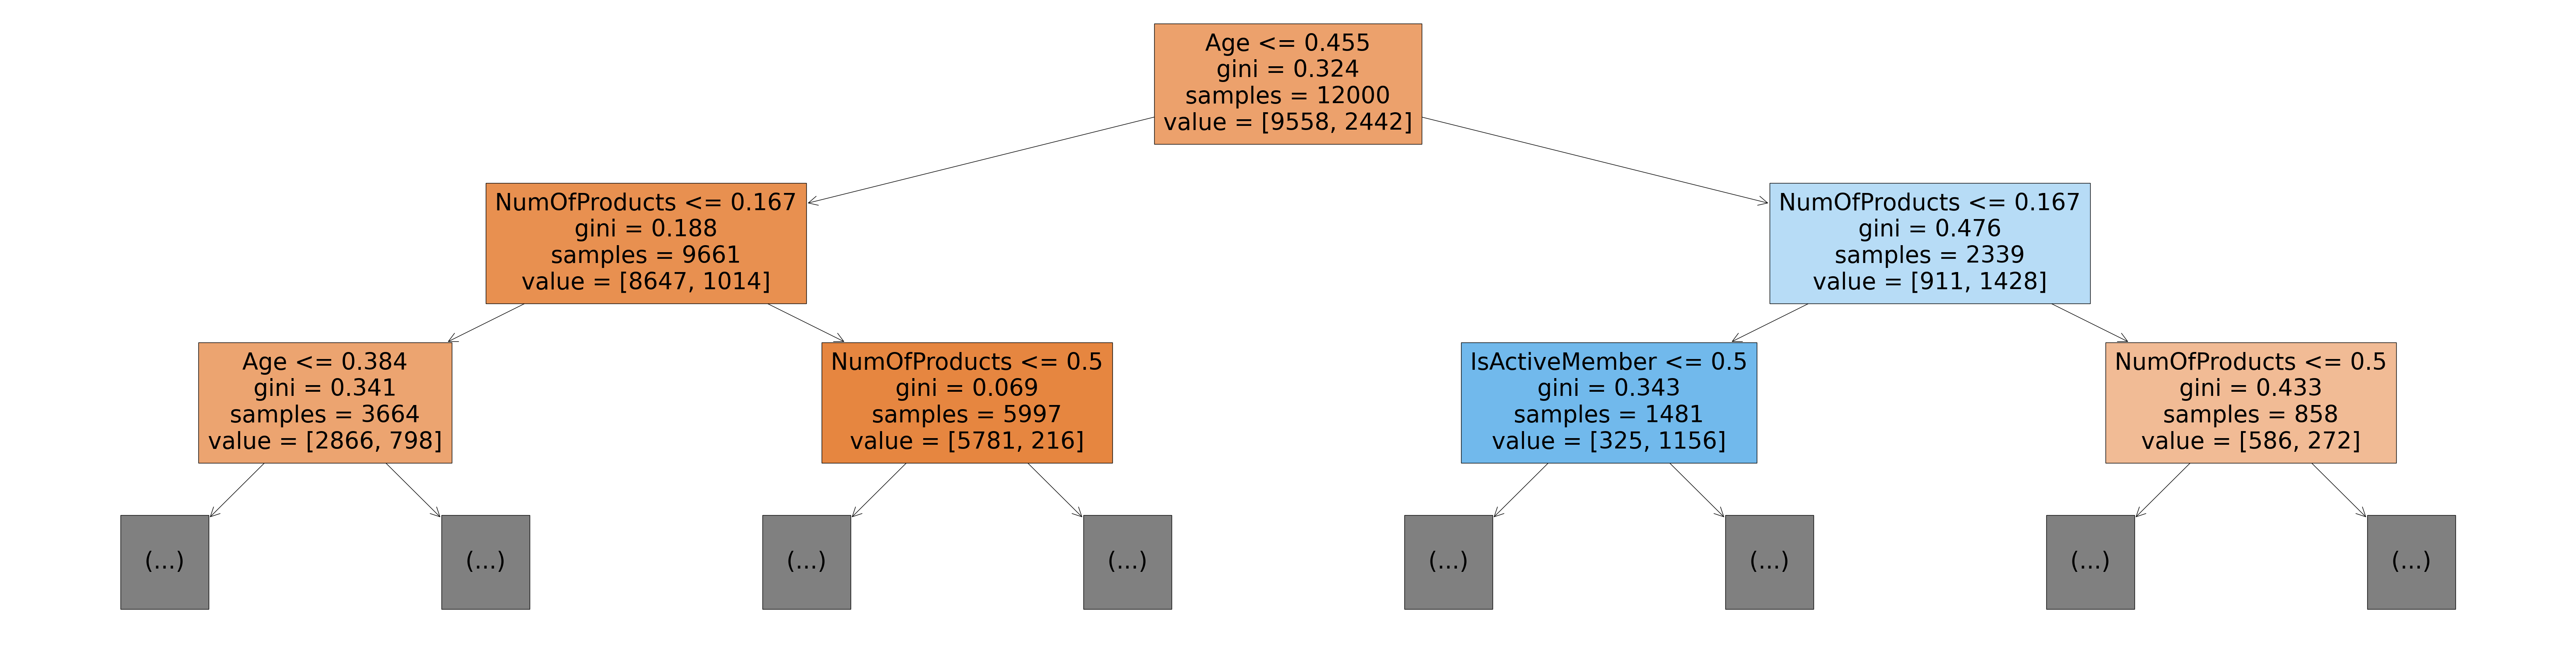

In [13]:
plt.figure(figsize=(80,20))
plot_tree(model, feature_names=X_train.columns, max_depth=2, filled=True)

In [14]:
model.feature_importances_.round(2)

array([0.09, 0.09, 0.35, 0.05, 0.07, 0.17, 0.01, 0.03, 0.09, 0.01, 0.01,
       0.01, 0.01, 0.01])

In [15]:
importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

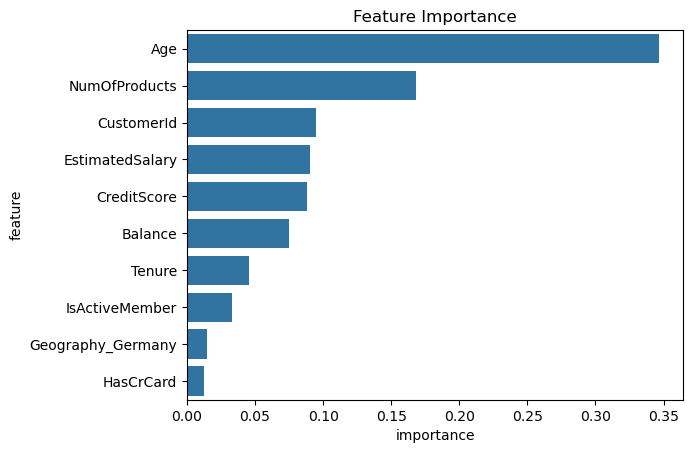

In [16]:
plt.title('Feature Importance')
sns.barplot(data=importance_df.head(10), x='importance', y='feature');

Let's try to find such parameters for the `DecisionTree` model to improve generalization (achieving a higher AUROC on the validation set). We'll experiment with different values for the parameters `max_leaf_nodes` and `max_depth`.


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import pandas as pd

def evaluate_model(max_depth, max_leaf_nodes):
    model = DecisionTreeClassifier(max_depth=max_depth, max_leaf_nodes=max_leaf_nodes, random_state=42)
    model.fit(X_train, train_targets)
    
    train_preds = model.predict_proba(X_train)[:, 1]
    val_preds = model.predict_proba(X_val)[:, 1]
    
    train_auroc = roc_auc_score(train_targets, train_preds)
    val_auroc = roc_auc_score(val_targets, val_preds)
    
    return {
        'Max Depth': max_depth,
        'Max Leaf Nodes': max_leaf_nodes,
        'Training AUROC': train_auroc,
        'Validation AUROC': val_auroc
    }

results = []
for md in range(1, 21):
    for mln in [None] + list(range(2, 21)):
        results.append(evaluate_model(md, mln))

errors_df = pd.DataFrame(results)

In [19]:
errors_df

,Max Depth,Max Leaf Nodes,Training AUROC,Validation AUROC
0,1,NaN,0.744727,0.734865
1,1,2.0,0.744727,0.734865
2,1,3.0,0.744727,0.734865
3,1,4.0,0.744727,0.734865
4,1,5.0,0.744727,0.734865
...,...,...,...,...
395,20,16.0,0.914511,0.913572
396,20,17.0,0.915222,0.915412
397,20,18.0,0.915403,0.915495
398,20,19.0,0.916936,0.915537


In [20]:
best_results = errors_df.loc[errors_df['Validation AUROC'].idxmax()]
best_results

Max Depth           5.000000
Max Leaf Nodes           NaN
Training AUROC      0.925766
Validation AUROC    0.921864
Name: 80, dtype: float64

In [21]:
errors_df[errors_df['Max Depth'] == 5]

,Max Depth,Max Leaf Nodes,Training AUROC,Validation AUROC
80,5,NaN,0.925766,0.921864
81,5,2.0,0.744727,0.734865
82,5,3.0,0.757345,0.751152
83,5,4.0,0.842908,0.846496
84,5,5.0,0.868674,0.859542
85,5,6.0,0.889387,0.881188
86,5,7.0,0.894222,0.887284
87,5,8.0,0.897184,0.891146
88,5,9.0,0.900114,0.898396
89,5,10.0,0.901475,0.900218


best depth - 5

Let's iterate through the values of `max_depth` from 1 to 20 inclusive. On each iteration, we'll train a `DecisionTree` model and measure the AUROC on both the training and validation datasets..


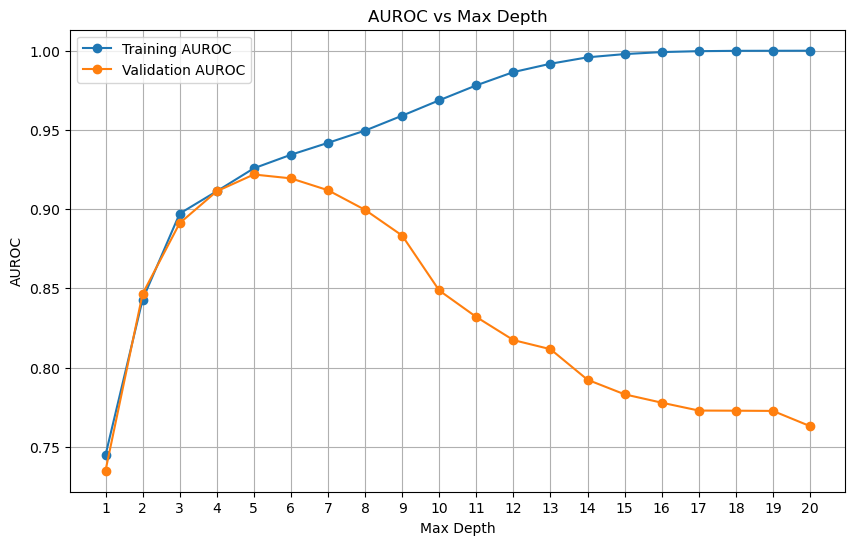

In [24]:
def evaluate_model_md(max_depth):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=42)
    model.fit(X_train, train_targets)
    
    train_preds = model.predict_proba(X_train)[:, 1]
    val_preds = model.predict_proba(X_val)[:, 1]
    
    train_auroc = roc_auc_score(train_targets, train_preds)
    val_auroc = roc_auc_score(val_targets, val_preds)
    
    return train_auroc, val_auroc

train_auroc_list = []
val_auroc_list = []

for md in range(1, 21):
    train_auroc, val_auroc = evaluate_model_md(md)
    train_auroc_list.append(train_auroc)
    val_auroc_list.append(val_auroc)

# Побудова графіка
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), train_auroc_list, label='Training AUROC', marker='o')
plt.plot(range(1, 21), val_auroc_list, label='Validation AUROC', marker='o')
plt.title('AUROC vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('AUROC')
plt.xticks(np.arange(1, 21, 1))
plt.grid()
plt.legend()
plt.show()

Next steps will be performed:
1. Training the `DecisionTree` model with the best value of `max_depth`.
2. Loading the competition test data from `test.csv`.
3. Preprocessing the test data using the `preprocess_new_data` function from the `process_bank_churn__.py` module.
4. Making predictions using the trained model on the competition test data.

In [26]:
model = DecisionTreeClassifier(max_depth=5, random_state=42)
model.fit(X_train, train_targets)
    
train_preds = model.predict_proba(X_train)[:, 1]
val_preds = model.predict_proba(X_val)[:, 1]

train_auroc = roc_auc_score(train_targets, train_preds)
val_auroc = roc_auc_score(val_targets, val_preds)

train_auroc, val_auroc

(0.9257663544386708, 0.921863639481446)

In [92]:
test_data = pd.read_csv('test.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [94]:
sample_submission = sample_submission['Exited']#.values
binary_sample_submission = (sample_submission >= 0.5).astype(int)

In [96]:
binary_sample_submission[0] = 0

In [74]:
fitted_transformers['encoder']

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [76]:
data_new = preprocess_new_data(
    test_data, 
    fitted_transformers, 'Surname'
)

In [78]:
data_new = data_new.set_index('id')

In [98]:
train_preds = model.predict_proba(X_train)[:, 1]
val_preds = model.predict_proba(X_val)[:, 1]
test_preds = model.predict_proba(data_new)[:, 1]

train_auroc = roc_auc_score(train_targets, train_preds)
val_auroc = roc_auc_score(val_targets, val_preds)
test_auroc = roc_auc_score(binary_sample_submission, test_preds)

train_auroc, val_auroc, test_auroc

(0.9257663544386708, 0.921863639481446, 0.23827382738273828)

In [64]:
type(val_targets), type(val_preds), val_targets.shape, val_preds.shape

(pandas.core.series.Series, numpy.ndarray, (3000,), (3000,))

In [66]:
type(sample_submission), type(test_preds), sample_submission.shape, test_preds.shape

(pandas.core.series.Series, numpy.ndarray, (10000,), (10000,))

- Train AUROC: 0.926
- Validation AUROC: 0.922
- Test AUROC: 0.238

The model performs well on the training (0.926) and validation (0.922) sets, indicating effective class discrimination. However, the test AUROC is low (0.238) due to the test set consisting entirely of class 1 labels, which limits the model's ability to evaluate its performance in distinguishing both classes. This low score is a result of the test set imbalance and not reflective of the model's overall capability.